<a href="https://colab.research.google.com/github/FelipeTriana/BreastCancerWisconsin/blob/master/BreastCancerWisconsin.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import matplotlib.pyplot as plt
import math
import numpy   as np
import pandas  as pd
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import metrics


from scipy.spatial.distance import euclidean
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.ensemble import GradientBoostingClassifier


from sklearn.model_selection  import  StratifiedKFold, KFold
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix



Pandas Cheat Sheet https://pandas.pydata.org/Pandas_Cheat_Sheet.pdf


# **Limpieza y preparacion de datos**


In [2]:
df = pd.read_csv('data.csv')
df

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,1.1760,1.2560,7.673,158.70,0.010300,0.02891,0.05198,0.02454,0.01114,0.004239,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,0.7655,2.4630,5.203,99.04,0.005769,0.02423,0.03950,0.01678,0.01898,0.002498,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,0.4564,1.0750,3.425,48.55,0.005903,0.03731,0.04730,0.01557,0.01318,0.003892,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,0.7260,1.5950,5.772,86.22,0.006522,0.06158,0.07117,0.01664,0.02324,0.006185,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN


In [3]:
df.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')

In [4]:
#Se eliminan dos columnas que no aportan informacion
df.drop('Unnamed: 32',axis=1,inplace=True)
df.drop('id',axis=1,inplace=True)

In [5]:
df

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,1.1760,1.2560,7.673,158.70,0.010300,0.02891,0.05198,0.02454,0.01114,0.004239,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,0.7655,2.4630,5.203,99.04,0.005769,0.02423,0.03950,0.01678,0.01898,0.002498,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,0.4564,1.0750,3.425,48.55,0.005903,0.03731,0.04730,0.01557,0.01318,0.003892,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,0.7260,1.5950,5.772,86.22,0.006522,0.06158,0.07117,0.01664,0.02324,0.006185,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [6]:
df.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,0.405172,1.216853,2.866059,40.337079,0.007041,0.025478,0.031894,0.011796,0.020542,0.003795,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,0.277313,0.551648,2.021855,45.491006,0.003003,0.017908,0.030186,0.006170,0.008266,0.002646,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,0.111500,0.360200,0.757000,6.802000,0.001713,0.002252,0.000000,0.000000,0.007882,0.000895,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,0.232400,0.833900,1.606000,17.850000,0.005169,0.013080,0.015090,0.007638,0.015160,0.002248,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,0.324200,1.108000,2.287000,24.530000,0.006380,0.020450,0.025890,0.010930,0.018730,0.003187,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,0.478900,1.474000,3.357000,45.190000,0.008146,0.032450,0.042050,0.014710,0.023480,0.004558,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,2.873000,4.885000,21.980000,542.200000,0.031130,0.135400,0.396000,0.052790,0.078950,0.029840,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [7]:
#No hay NaN
for col in df.columns:
    print (col, np.sum(pd.isnull(df[col]))) 

diagnosis 0
radius_mean 0
texture_mean 0
perimeter_mean 0
area_mean 0
smoothness_mean 0
compactness_mean 0
concavity_mean 0
concave points_mean 0
symmetry_mean 0
fractal_dimension_mean 0
radius_se 0
texture_se 0
perimeter_se 0
area_se 0
smoothness_se 0
compactness_se 0
concavity_se 0
concave points_se 0
symmetry_se 0
fractal_dimension_se 0
radius_worst 0
texture_worst 0
perimeter_worst 0
area_worst 0
smoothness_worst 0
compactness_worst 0
concavity_worst 0
concave points_worst 0
symmetry_worst 0
fractal_dimension_worst 0


In [8]:
df["diagnosis"]

0      M
1      M
2      M
3      M
4      M
      ..
564    M
565    M
566    M
567    M
568    B
Name: diagnosis, Length: 569, dtype: object

In [9]:
df.diagnosis.unique()

array(['M', 'B'], dtype=object)

In [10]:
df['diagnosis'] = df['diagnosis'].map({'M':1,'B':0}) #Ejecutar una sola vez
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [11]:
df.diagnosis.unique()

array([1, 0])

# **Preparacion, graficas y normalizacion de caracteristicas**

In [12]:
y = df.diagnosis.values
print(y.shape) #OJO: Esta es la dimension que reconocen los modelos de sklearn para las variables de salida

(569,)


In [13]:
dfCopy = df.copy()                              #Hacemos una copia del dataset original
dfCopy.drop(["diagnosis"],axis=1,inplace=True)  #Eliminamos la columnna que corresponde a la variable de salida
x = dfCopy.values                               #Guardamos como un array de numpy el nuevo dataset que contiene SOLO las caracteristicas
print(x)

[[1.799e+01 1.038e+01 1.228e+02 ... 2.654e-01 4.601e-01 1.189e-01]
 [2.057e+01 1.777e+01 1.329e+02 ... 1.860e-01 2.750e-01 8.902e-02]
 [1.969e+01 2.125e+01 1.300e+02 ... 2.430e-01 3.613e-01 8.758e-02]
 ...
 [1.660e+01 2.808e+01 1.083e+02 ... 1.418e-01 2.218e-01 7.820e-02]
 [2.060e+01 2.933e+01 1.401e+02 ... 2.650e-01 4.087e-01 1.240e-01]
 [7.760e+00 2.454e+01 4.792e+01 ... 0.000e+00 2.871e-01 7.039e-02]]


In [14]:
dfCopy

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,1.1760,1.2560,7.673,158.70,0.010300,0.02891,0.05198,0.02454,0.01114,0.004239,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,0.7655,2.4630,5.203,99.04,0.005769,0.02423,0.03950,0.01678,0.01898,0.002498,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,0.4564,1.0750,3.425,48.55,0.005903,0.03731,0.04730,0.01557,0.01318,0.003892,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,0.7260,1.5950,5.772,86.22,0.006522,0.06158,0.07117,0.01664,0.02324,0.006185,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [15]:
#Funcion para ver numero de muestras, caracteristicas y clases
def muestras_carac_clases(X, Y):
    N,nf = X.shape
    clases = len(np.unique(Y))
    
    return (N,nf,clases)

In [16]:
muestras_carac_clases(x,y)

(569, 30, 2)

Distribucion de las muestras por clases

<function matplotlib.pyplot.show>

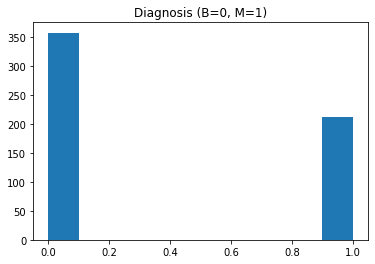

In [17]:
plt.hist(y)
plt.title('Diagnosis (B=0, M=1)')
plt.show

Ahora observaremos la relacion entre las caracteristicas medias(Las 10 primeras caracteristicas) y cada clase

In [18]:
#Partimos el dataframe segun la clase
dfM=df[df['diagnosis'] == 1]  
dfB=df[df['diagnosis'] == 0]
print(dfB)

     diagnosis  radius_mean  ...  symmetry_worst  fractal_dimension_worst
19           0       13.540  ...          0.2977                  0.07259
20           0       13.080  ...          0.3184                  0.08183
21           0        9.504  ...          0.2450                  0.07773
37           0       13.030  ...          0.1987                  0.06169
46           0        8.196  ...          0.3105                  0.07409
..         ...          ...  ...             ...                      ...
558          0       14.590  ...          0.2258                  0.08004
559          0       11.510  ...          0.2112                  0.08732
560          0       14.050  ...          0.2250                  0.08321
561          0       11.200  ...          0.1566                  0.05905
568          0        7.760  ...          0.2871                  0.07039

[357 rows x 31 columns]


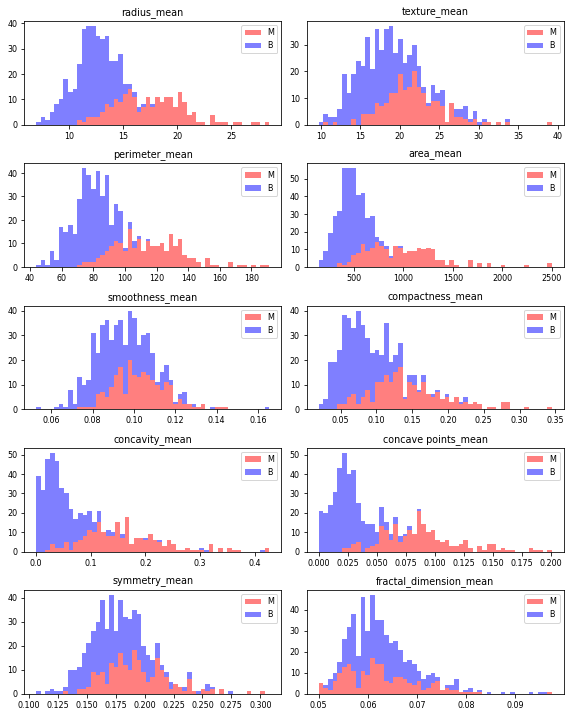

In [19]:
np.warnings.filterwarnings('ignore', category=np.VisibleDeprecationWarning) 

#Un histograma muestra datos numéricos agrupando los datos en "bins(contenedores)" de igual ancho.
features_mean=list(df.columns[1:11])
plt.rcParams.update({'font.size': 8})
fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(8,10))
axes = axes.ravel()
for idx,ax in enumerate(axes):
    ax.figure
    binwidth = (max(df[features_mean[idx]]) - min(df[features_mean[idx]]))/50  #Ancho de los bins generalizado 
    ax.hist([dfM[features_mean[idx]],dfB[features_mean[idx]]], bins=np.arange(min(df[features_mean[idx]]), max(df[features_mean[idx]]) + binwidth, binwidth), alpha=0.5,stacked=True, label=['M','B'],color=['r','b'])
    ax.legend(loc='upper right')
    ax.set_title(features_mean[idx])
plt.tight_layout()
plt.show()

Ahora normalizaremos las caracteristicas

In [20]:
#Separamos las caracteristicas sin normalizar
xForNormalize = dfCopy.values

In [21]:
scaler = StandardScaler().fit(xForNormalize)

#Guardamos en nuestra variable x las caracteristicas normalizadas
x = scaler.transform(xForNormalize)

In [22]:
#Ver caracteristicas sin normalizar
xForNormalize[range(2), :]

array([[1.799e+01, 1.038e+01, 1.228e+02, 1.001e+03, 1.184e-01, 2.776e-01,
        3.001e-01, 1.471e-01, 2.419e-01, 7.871e-02, 1.095e+00, 9.053e-01,
        8.589e+00, 1.534e+02, 6.399e-03, 4.904e-02, 5.373e-02, 1.587e-02,
        3.003e-02, 6.193e-03, 2.538e+01, 1.733e+01, 1.846e+02, 2.019e+03,
        1.622e-01, 6.656e-01, 7.119e-01, 2.654e-01, 4.601e-01, 1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, 1.326e+03, 8.474e-02, 7.864e-02,
        8.690e-02, 7.017e-02, 1.812e-01, 5.667e-02, 5.435e-01, 7.339e-01,
        3.398e+00, 7.408e+01, 5.225e-03, 1.308e-02, 1.860e-02, 1.340e-02,
        1.389e-02, 3.532e-03, 2.499e+01, 2.341e+01, 1.588e+02, 1.956e+03,
        1.238e-01, 1.866e-01, 2.416e-01, 1.860e-01, 2.750e-01, 8.902e-02]])

In [23]:
#Caracteristicas normalizadas
x[range(2), :]

array([[ 1.09706398e+00, -2.07333501e+00,  1.26993369e+00,
         9.84374905e-01,  1.56846633e+00,  3.28351467e+00,
         2.65287398e+00,  2.53247522e+00,  2.21751501e+00,
         2.25574689e+00,  2.48973393e+00, -5.65265059e-01,
         2.83303087e+00,  2.48757756e+00, -2.14001647e-01,
         1.31686157e+00,  7.24026158e-01,  6.60819941e-01,
         1.14875667e+00,  9.07083081e-01,  1.88668963e+00,
        -1.35929347e+00,  2.30360062e+00,  2.00123749e+00,
         1.30768627e+00,  2.61666502e+00,  2.10952635e+00,
         2.29607613e+00,  2.75062224e+00,  1.93701461e+00],
       [ 1.82982061e+00, -3.53632408e-01,  1.68595471e+00,
         1.90870825e+00, -8.26962447e-01, -4.87071673e-01,
        -2.38458552e-02,  5.48144156e-01,  1.39236330e-03,
        -8.68652457e-01,  4.99254601e-01, -8.76243603e-01,
         2.63326966e-01,  7.42401948e-01, -6.05350847e-01,
        -6.92926270e-01, -4.40780058e-01,  2.60162067e-01,
        -8.05450380e-01, -9.94437403e-02,  1.80592744e+

In [24]:
#Ver las etiquetas de cada clase
y

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,

# **Experimentos**

Vamos a crear los conjuntos de datos de entrenamiento y validacion o test

In [25]:
Xtrain, Xtest, Ytrain, Ytest = train_test_split( x, y, test_size=0.3, random_state=0 )

print("Train samples: " , len(Xtrain) )
print("Train classes: " , len(Ytrain) )
print("-------------------")
print("Test samples:  " , len(Xtest)  )
print("Test classes:  " , len(Ytest)  )

Train samples:  398
Train classes:  398
-------------------
Test samples:   171
Test classes:   171


# Modelo de Analisis Discriminante Cuadratico

In [26]:
def quadraticDiscriminantAnalysis( X_Train, Y_Train ):
    
    folds = KFold( n_splits = 4 )
    trainEfficiency = np.zeros(4) 
    validationEfficiency = np.zeros(4)
    idx = 0     #Inicializa iteraciones
    results = pd.DataFrame()
   
    
    for train, test in folds.split( X_Train, Y_Train ):
        
        X_train, Y_train = X_Train[train], Y_Train[train]
        X_test, Y_test = X_Train[test], Y_Train[test]
        
        QDA = QuadraticDiscriminantAnalysis()
        QDA = QDA.fit(X_train, Y_train)    
        
        predictionTrain = QDA.predict( X_train )
        predictionValidation = QDA.predict( X_test )
        trainEfficiency[ idx ] = np.mean( predictionTrain.ravel() == Y_train.ravel() ) 
        validationEfficiency[ idx ] = np.mean( predictionValidation.ravel()    == Y_test.ravel() )
        
        idx = idx + 1

        
    meanEfficiencytrain = np.mean(trainEfficiency)
    stdEfficiencytrain = np.std(trainEfficiency)
    meanEfficiencyValidation = np.mean(validationEfficiency)
    stdEfficiencyValidation = np.std(validationEfficiency)


    results.loc[1,'Eficiencia entrenamiento'] = meanEfficiencytrain
    results.loc[1,'Desviacion estandar entrenamiento'] = stdEfficiencytrain
    results.loc[1,'Eficiencia validacion'] = meanEfficiencyValidation
    results.loc[1,'Desviacion estandar validacion'] = stdEfficiencyValidation
    results.loc[1,'modelo'] = QDA

    return results

In [27]:
result = quadraticDiscriminantAnalysis( Xtrain, Ytrain)
a = result.loc[1,'modelo']
b = result.loc[1,'Eficiencia entrenamiento']
c = result.loc[1,'Desviacion estandar entrenamiento']
d = result.loc[1,'Eficiencia validacion']
e = result.loc[1,'Desviacion estandar validacion']
result

,Eficiencia entrenamiento,Desviacion estandar entrenamiento,Eficiencia validacion,Desviacion estandar validacion,modelo
1,0.974038,0.002762,0.959848,0.014072,"QuadraticDiscriminantAnalysis(priors=None, reg..."


En la documentacion de skalearn podemos encontrar la informacion referente a las metricas que usaremos acontinuacion.
https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html

https://scikit-learn.org/stable/modules/generated/sklearn.metrics.precision_recall_fscore_support.html#sklearn.metrics.precision_recall_fscore_support

In [28]:
#Metodo para comparar los valores del modelo con la muestra de test extraida
def modelEvaluatorQDA( trainedModel, meanEfficiencytrain, stdEfficiencytrain, meanEfficiencyValidation, stdEfficiencyValidation, X_test, Y_test):
    
    results = pd.DataFrame()
    modelPrediction = trainedModel.predict( X_test )
    
    results.loc['Exactitud(Accuracy)',''] = accuracy_score( Y_test, modelPrediction)
    results.loc['Recall',''] = recall_score(Y_test,modelPrediction)
    print("\nA continuacion un informe de texto que muestra las principales métricas de clasificación. \n")
    print("sklearn nos invita a tener en cuenta que en la clasificación binaria, el recall de la clase ")
    print("positiva también se conoce como 'sensibilidad'; el recall de la clase negativa como 'especificidad' \n")
    print("En este problema de diagnostico es mas importante la sensibilidad(El recall de la clase 0) y arrojo un 95%, por lo que")
    print("tenemos un 5% de las muestras clasificadas como falsos negativos. \n")

    target_names = ['Benigno:0', 'Maligno:1']
    print( classification_report( Y_test, modelPrediction, target_names=target_names) )
    
    
    #Matriz de confusion
    cols = ['Clase %s'%(i) for i in range(0, len(np.unique(y)))]
    matrix = confusion_matrix(Y_test, modelPrediction, normalize = 'all' )
    dfMatrix = pd.DataFrame( matrix , index = cols , columns = cols)
    grafMatrix = sns.heatmap( dfMatrix, cmap = 'Greens', annot = True, linecolor="k",linewidths=3 )
    grafMatrix.set(xlabel = 'Verdaderos', ylabel = 'Estimados')
    plt.title("Matriz de confusión",fontsize=50)

    results.loc['Eficiencia Entrenamiento',''] = '' +  str(meanEfficiencytrain ) + ' +/- ' + str(stdEfficiencytrain)
    results.loc['Eficiencia Validacion',''] = '' +  str(meanEfficiencyValidation)     + ' +/- ' + str(stdEfficiencyValidation)
    return results


A continuacion un informe de texto que muestra las principales métricas de clasificación. 

sklearn nos invita a tener en cuenta que en la clasificación binaria, el recall de la clase 
positiva también se conoce como 'sensibilidad'; el recall de la clase negativa como 'especificidad' 

En este problema de diagnostico es mas importante la sensibilidad(El recall de la clase 0) y arrojo un 95%, por lo que
tenemos un 5% de las muestras clasificadas como falsos negativos. 

              precision    recall  f1-score   support

   Benigno:0       0.98      0.96      0.97       108
   Maligno:1       0.94      0.97      0.95        63

    accuracy                           0.96       171
   macro avg       0.96      0.97      0.96       171
weighted avg       0.97      0.96      0.97       171



,
Exactitud(Accuracy),0.964912
Recall,0.968254
Eficiencia Entrenamiento,0.9740381809611456 +/- 0.0027624015889440353
Eficiencia Validacion,0.9598484848484847 +/- 0.014071526439629427


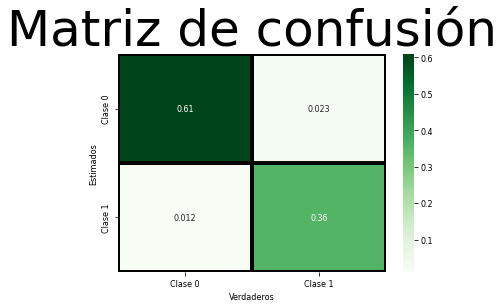

In [29]:
modelEvaluatorQDA(a,b,c,d,e, Xtest, Ytest)

# Modelo de Ventana de Parzen



In [30]:
def kernel_gaussiano(x):
    """Calcula el kernel gaussiano de x
    x: matriz/vector de numpy
    retorna: el valor de de kernel gaussiano
    """
    return np.exp((-0.5)*x**2)

def ErrorClas(Y_lest, Y):
    """funcion que calcula el error de clasificación
    Y_lest: numpy array con la estimaciones de etiqueta
    Y: etiquetas reales
    retorna: error de clasificación (int)
    """
    error = 1 - np.sum(Y_lest == Y)/len(Y)
    
    return error

def ParzenWindow(x,Data,h):
    """"ventana de parzen
    x: vector con representando una sola muestra
    Data: vector de muestras de entrenamiento
    h: ancho de la ventana de kernel
    retorna: el valor de ventana de parzen para una muestra
    """
    h = h
    Ns = Data.shape[0]
    suma = 0
    for k in range(Ns):
        u = euclidean(x,Data[k,:])
        suma += kernel_gaussiano(u/h)
    return suma

In [31]:
def parzenClass(X_train, Y_train, X_test, h):
    """ Funcion que implementa metodo de ventana de parzen para
        para clasificación
    X_train: es la matriz con las muestras de entrenamiento
    Y_train: es un vector con los valores de salida pra cada una de las muestras de entrenamiento
    X_test: es la matriz con las muestras de validación
    h (float): ancho de h de la ventana
    retorna: - las estimaciones del modelo parzen para el conjunto X_test 
              esta matriz debe tener un shape de [row/muestras de X_test]
             - las probabilidades de la vetana [row/muestras de X_test, número de clases]  
    """
        
    Yest = np.zeros(X_test.shape[0])
    clases = np.unique(Y_train)
    fds_matrix = np.zeros((X_test.shape[0], len(clases)))
    
    
    ## pista: recuerde el termino que acompaña al sumatoria (N)
    
    for i, row in enumerate (X_test):
      
        for j,lb in enumerate(clases):
          ind = np.ravel(np.where(Y_train == lb))
          xDt = np.take(X_train,ind,axis=0)
          fds_matrix[i,j] = ParzenWindow(row,xDt,h)/(len(Y_train[Y_train==lb]))
        
        Yest[i]=np.argmax(fds_matrix[i:,])
           
       
    
    

    #Debe retornar un vector que contenga las predicciones para cada una de las muestras en X_val, en el mismo orden.  
    return Yest, fds_matrix

In [32]:
modelPredictionPz, matrixPz = parzenClass(Xtrain,Ytrain, Xtest, 1)
print(modelPredictionPz.shape)

(171,)


In [33]:
print(Ytest.shape)

(171,)


In [34]:
accuracy_score( Ytest, modelPredictionPz)

0.9532163742690059

In [35]:
target_names = ['Benigno:0', 'Maligno:1']
print( classification_report( Ytest, modelPredictionPz, target_names=target_names) )

              precision    recall  f1-score   support

   Benigno:0       0.95      0.98      0.96       108
   Maligno:1       0.97      0.90      0.93        63

    accuracy                           0.95       171
   macro avg       0.96      0.94      0.95       171
weighted avg       0.95      0.95      0.95       171



In [36]:
#Solo error de validacion, NO TIENE FASE DE ENTRENAMIENTO

def modelEvaluatorParzen (X_Train, Y_Train, hs):
  
    skf = KFold(n_splits=4)
    resultados = pd.DataFrame()
    idx = 0

    for h in hs:
        error_temp = []
        accuracyV = []
        recallV = []
        for train, test in skf.split(X_Train, Y_Train):

            X_train, Y_train = X_Train[train], Y_Train[train]
            X_test, Y_test = X_Train[test], Y_Train[test]

            Yest, probabilidades = parzenClass(X_train,Y_train,X_test,h)
            errorTest = ErrorClas(Yest,Y_test)
            error_temp.append(errorTest)
            accuracyV.append(accuracy_score( Y_test, Yest))      
            recallV.append(recall_score(Y_test, Yest))                

        resultados.loc[idx,'ancho de ventana'] = h 
        resultados.loc[idx,'error de prueba(media)'] = np.mean(error_temp)
        resultados.loc[idx,'error de prueba(desviación estandar)'] = np.std(error_temp)
        resultados.loc[idx,'accuracy'] = np.mean(accuracyV)
        resultados.loc[idx,'recall'] = np.mean(recallV)
        idx+=1
    return (resultados)

In [37]:
hs = [0.05, 0.1, 0.5, 1, 2, 5, 10]
predictions_parzen = modelEvaluatorParzen(Xtrain,Ytrain, hs)
predictions_parzen

,ancho de ventana,error de prueba(media),error de prueba(desviación estandar),accuracy,recall
0,0.05,0.331717,0.023267,0.668283,0.127966
1,0.10,0.115581,0.018212,0.884419,0.738769
2,0.50,0.047727,0.017887,0.952273,0.938826
3,1.00,0.035152,0.004848,0.964848,0.938330
4,2.00,0.047677,0.017795,0.952323,0.884367
5,5.00,0.077929,0.013329,0.922071,0.791849
6,10.00,0.098005,0.015020,0.901995,0.743703


In [38]:
predictions_parzen = modelEvaluatorParzen(Xtest,Ytest, [2])
predictions_parzen

,ancho de ventana,error de prueba(media),error de prueba(desviación estandar),accuracy,recall
0,2.0,0.064507,0.030753,0.935493,0.865397



# Gradient Boosted Three

In [74]:
modelo = GradientBoostingClassifier(n_estimators=5)

In [75]:
modelo = modelo.fit(Xtrain,Ytrain)

In [76]:
#predecir muestras de entrenamiento
Ytrain_pred = modelo.predict(Xtrain) 
#predecir muestras de pruebas
Yesti = modelo.predict(Xtest)

In [77]:
print(Ytrain_pred)

[0 0 0 1 0 0 0 0 1 1 0 0 0 0 0 0 0 1 0 0 1 1 0 0 1 1 0 0 1 0 0 1 1 1 0 0 0
 1 0 0 0 0 0 1 0 1 0 1 0 1 0 1 0 0 0 0 1 0 1 0 0 0 1 0 0 0 1 0 0 1 1 0 1 0
 1 0 1 1 1 1 0 0 0 1 0 1 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0
 0 0 0 0 1 0 1 0 0 1 0 1 1 0 1 1 0 0 1 0 0 0 1 0 0 0 0 0 1 1 0 0 0 0 1 1 0
 0 0 0 0 0 0 1 0 0 1 0 1 0 0 0 0 1 1 0 0 0 1 0 1 1 0 0 0 0 0 1 0 0 1 0 0 1
 1 0 0 0 1 1 0 0 1 0 0 0 1 0 1 0 1 1 1 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0
 1 1 1 1 0 0 1 0 0 0 1 1 0 0 0 0 0 1 1 1 0 1 1 0 0 0 0 0 0 1 0 0 0 0 0 0 1
 1 0 1 0 1 1 0 0 0 0 0 1 1 1 0 0 1 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 1 0 0
 0 1 0 0 0 0 1 0 1 1 1 0 1 0 1 0 1 1 0 0 0 0 0 0 0 0 1 1 1 1 1 0 0 0 0 0 0
 0 1 0 1 0 0 0 1 0 1 1 1 0 1 0 0 1 1 1 1 0 1 1 1 0 1 0 1 0 0 1 0 0 1 0 0 0
 0 1 0 0 1 0 0 0 1 1 0 0 0 1 0 0 1 0 0 0 0 0 1 1 1 0 0 0]


In [78]:
print(Yesti)

[1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 0 0 1 0 0 1 0 1 0 1 0 1 0 1 0
 1 0 1 0 0 1 0 0 1 0 0 0 1 1 1 1 0 0 0 0 0 0 1 1 1 0 0 1 0 1 1 1 0 0 1 0 0
 1 0 0 0 0 0 1 1 1 0 1 0 0 0 1 1 0 1 0 1 0 0 1 0 0 0 0 0 0 0 1 0 1 0 1 0 0
 1 1 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 1 0 0 1 0 1
 0 0 0 1 0 0 0 1 0 0 0 1 1 0 0 1 0 1 1 1 0 0 0]


In [79]:
accuracy_score(Ytrain,Ytrain_pred)

0.9698492462311558

In [80]:
accuracy_score(Ytest,Yesti)

0.9649122807017544